In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
body = pd.read_csv("data/body.tsv", sep='\t')
body.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


In [3]:
df = body.head(10000)

G = nx.from_pandas_edgelist(df, source="SOURCE_SUBREDDIT", target="TARGET_SUBREDDIT", create_using=nx.DiGraph, edge_attr=("TIMESTAMP", "LINK_SENTIMENT"))


In [11]:
in_degree = np.array([x[1] for x in G.in_degree()])
out_degree = np.array([x[1] for x in G.out_degree()])

layout = nx.spring_layout(G)

max_in = np.log(in_degree.max()+1)
max_out = np.log(out_degree.max()+1)

a = np.log(in_degree+1)/max_in
b = np.log(out_degree+1)/max_out
colours = list(zip(a, np.zeros(a.shape), b))
#colours = [(np.log(inn+1)/max_in, 0, np.log(out+1)/max_out) for inn, out in zip(in_degree, out_degree)]


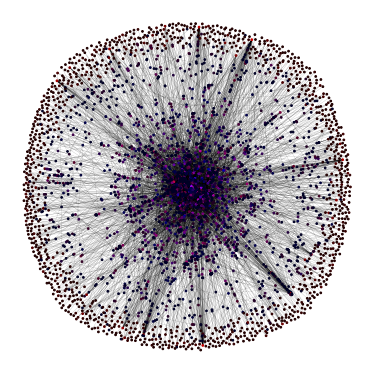

In [16]:
plt.figure(figsize=(5,5))
nx.draw(G, pos=layout, node_size=3, arrows=False, node_color=colours, width = 0.08)